In [38]:
using CSV
using DataFrames
using PyPlot

In [12]:
steak_file_loc = joinpath("steak", "steak.csv")

"steak/steak.csv"

In [19]:
df_steak = CSV.read(steak_file_loc, header=[:eats_steak, :how_cooked], copycols=true)

,eats_steak,how_cooked
,String⍰,String⍰
1,Yes,Medium rare
2,Yes,Rare
3,Yes,Medium
4,Yes,Medium
5,Yes,Medium rare
6,No,missing
7,Yes,Medium rare
8,Yes,Medium
9,Yes,Medium rare


In [21]:
first(df_steak, 10)

,eats_steak,how_cooked
,String⍰,String⍰
1,Yes,Medium rare
2,Yes,Rare
3,Yes,Medium
4,Yes,Medium
5,Yes,Medium rare
6,No,missing
7,Yes,Medium rare
8,Yes,Medium
9,Yes,Medium rare


In [24]:
dropmissing!(df_steak)

,eats_steak,how_cooked
,String,String
1,Yes,Medium rare
2,Yes,Rare
3,Yes,Medium
4,Yes,Medium
5,Yes,Medium rare
6,Yes,Medium rare
7,Yes,Medium
8,Yes,Medium rare
9,Yes,Medium rare


In [44]:
nb_preferences = unique(df_steak[:, :how_cooked])
nb_preferences_ids = [2, 1, 3, 4, 5]

5-element Array{Int64,1}:
 2
 1
 3
 4
 5

In [26]:
df_prefs = by(df_steak, :how_cooked, total_eaters=:how_cooked => col -> length(col))

,how_cooked,total_eaters
,String,Int64
1,Medium rare,166
2,Rare,23
3,Medium,132
4,Medium Well,74
5,Well,35


In [30]:
df_prefs = by(df_steak, :how_cooked, nrow)
rename!(df_prefs, :x1 => :total_eaters)

,how_cooked,total_eaters
,String,Int64
1,Medium rare,166
2,Rare,23
3,Medium,132
4,Medium Well,74
5,Well,35


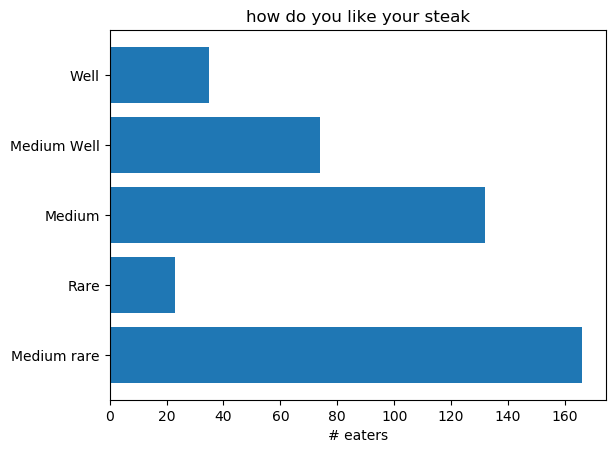

PyObject Text(0.5, 1, 'how do you like your steak')

In [42]:
figure()
barh(1:nrow(df_prefs), df_prefs[:, :total_eaters])
yticks(1:nrow(df_prefs), df_prefs[:, :how_cooked])
xlabel("# eaters")
title("how do you like your steak")